In [2]:
library(ggplot2)
library("DESeq2")
library(tibble)
library(ggpubr)
library(ggsci)
require("ggrepel")
library(tidyverse)
library(ggExtra)
library("ggsci")

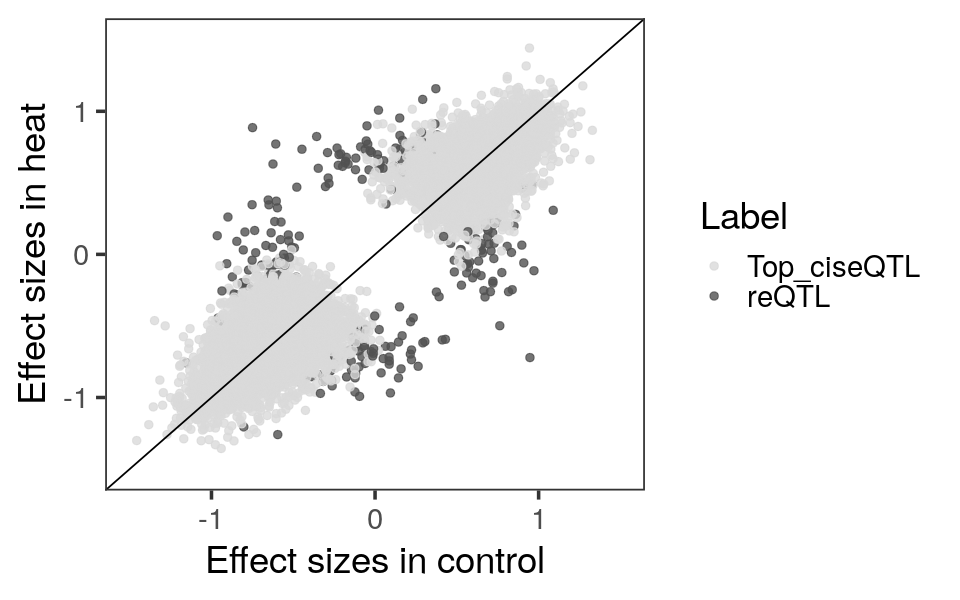

In [3]:
# effect of eQTL classification

control = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/allfinalreQTLs/Control-eQTLmatrix-reQTL-effect.txt",sep='\t',head=F)
heat = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/allfinalreQTLs/Heat-eQTLmatrix-reQTL-effect.txt",sep='\t',head=F)
cand = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/allfinalreQTLs/cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction-Dec-all.bonferroni.txt")
data = control %>% left_join(heat, by="V1") %>% mutate(Label = ifelse(V1 %in% cand$V8, "reQTL", "Top_ciseQTL"))
data$Label = factor(data$Label, levels=c("Top_ciseQTL","reQTL"))
options(repr.plot.width=8, repr.plot.height=5)
x = ggscatter(data, x="V2.x", y="V2.y", color="Label",alpha=0.8)+theme_bw(base_size = 22)+
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))+xlim(-1.5,1.5)+ylim(-1.5,1.5)+xlab("Effect sizes in control")+ylab("Effect sizes in heat")+
    scale_colour_manual(values = c("#d9d9d9", "#525252"))+geom_abline(intercept = 0, slope = 1)
x

,V1,V2
,<fct>,<fct>
1,Zm00001d002125:S2_6291804,Gene:01
2,Zm00001d002889:S2_25919086,Gene:07
3,Zm00001d002942:S2_27771339,A:<-3kb
4,Zm00001d003252:S2_38332012,A:<-3kb
5,Zm00001d003559:S2_48114808,A:<-3kb
6,Zm00001d003867:S2_64013148,Gene:09


,V1,V2
,<fct>,<fct>
1,ENSRNA049458957:S5_195879558,Z:>3kb
2,ENSRNA049458957:S5_195864845,A:<-3kb
3,ENSRNA049459076:S5_195864265,A:<-3kb
4,ENSRNA049459076:S5_195873535,Z:10
5,ENSRNA049459101:S5_195640520,A:<-3kb
6,ENSRNA049459101:S5_195879594,Z:>3kb


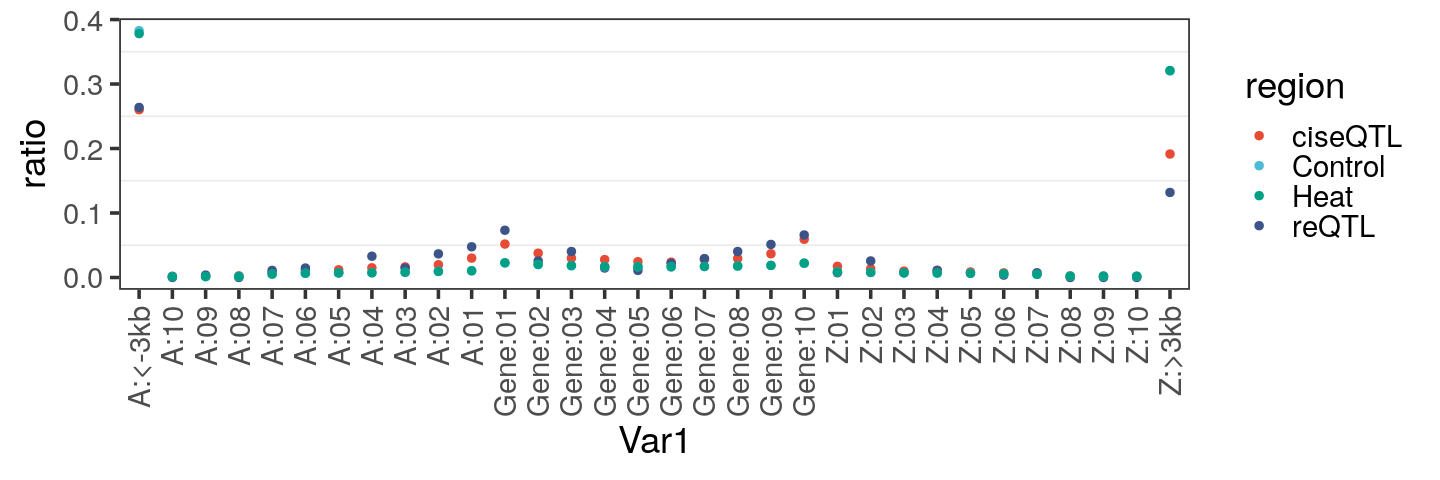

In [8]:
# reQTL distribution
r1 = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/allfinalreQTLs/cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction-Dec-all.bonferroni.distribution.txt",head=F,sep='\t')
head(r1)
r2 = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/allfinalreQTLs/cis-reQTL-control-heat-select-candidate-Dec-all-results.distribution.txt",sep='\t',head=F)
r3 = r2 %>% filter(!V1 %in% r1$V1)
head(r3)
x1 = data.frame(table(r1$V2))
x2 = data.frame(table(r2$V2))
x3 = data.frame(table(r3$V2)) %>% mutate(region='ciseQTL')
add = data.frame(Var1 = c('A:08','A:10','Z:08','Z:09','Z:10'), Freq=c(0,0,0,0,0))
y1 = data.frame(rbind(x1, add)) %>% mutate(region='reQTL')
data = data.frame(rbind(x3, y1))
y1$Var1 = factor(y1$Var1, levels=c('A:<-3kb','A:10','A:09','A:08','A:07','A:06','A:05','A:04','A:03','A:02','A:01',
                                   'Gene:01','Gene:02','Gene:03','Gene:04','Gene:05','Gene:06','Gene:07','Gene:08',
                                   'Gene:09','Gene:10','Z:01','Z:02','Z:03','Z:04','Z:05','Z:06','Z:07',
                                   'Z:08','Z:09','Z:10','Z:>3kb'))
x3$Var1 = factor(x3$Var1, levels=c('A:<-3kb','A:10','A:09','A:08','A:07','A:06','A:05','A:04','A:03','A:02','A:01',
                                   'Gene:01','Gene:02','Gene:03','Gene:04','Gene:05','Gene:06','Gene:07','Gene:08',
                                   'Gene:09','Gene:10','Z:01','Z:02','Z:03','Z:04','Z:05','Z:06','Z:07',
                                   'Z:08','Z:09','Z:10','Z:>3kb'))

control = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/Control-eQTLmatrix-1e-3-newclassify-cistrans-cis.distribution.txt",sep='\t',head=F)
heat = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/Heat-eQTLmatrix-1e-3-newclassify-cistrans-cis.distribution.txt",sep='\t',head=F)
cdata = data.frame(table(control$V2)) %>% slice(-1) %>% mutate(region = 'Control')
hdata = data.frame(table(heat$V2)) %>% slice(-1) %>% mutate(region = 'Heat')
cdata$Var1 = factor(cdata$Var1, levels=c('A:<-3kb','A:10','A:09','A:08','A:07','A:06','A:05','A:04','A:03','A:02','A:01',
                                   'Gene:01','Gene:02','Gene:03','Gene:04','Gene:05','Gene:06','Gene:07','Gene:08',
                                   'Gene:09','Gene:10','Z:01','Z:02','Z:03','Z:04','Z:05','Z:06','Z:07',
                                   'Z:08','Z:09','Z:10','Z:>3kb'))
hdata$Var1 = factor(hdata$Var1, levels=c('A:<-3kb','A:10','A:09','A:08','A:07','A:06','A:05','A:04','A:03','A:02','A:01',
                                   'Gene:01','Gene:02','Gene:03','Gene:04','Gene:05','Gene:06','Gene:07','Gene:08',
                                   'Gene:09','Gene:10','Z:01','Z:02','Z:03','Z:04','Z:05','Z:06','Z:07',
                                   'Z:08','Z:09','Z:10','Z:>3kb'))
data = data.frame(rbind(x3, y1, cdata, hdata))
data1 = data %>% group_by(region) %>% mutate(ratio = Freq/sum(Freq)) %>% ungroup()
options(repr.plot.width=12, repr.plot.height=4)
fig = ggscatter(data1,"Var1","ratio",color="region")+theme_bw(base_size = 22)+  
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+scale_color_npg()
fig

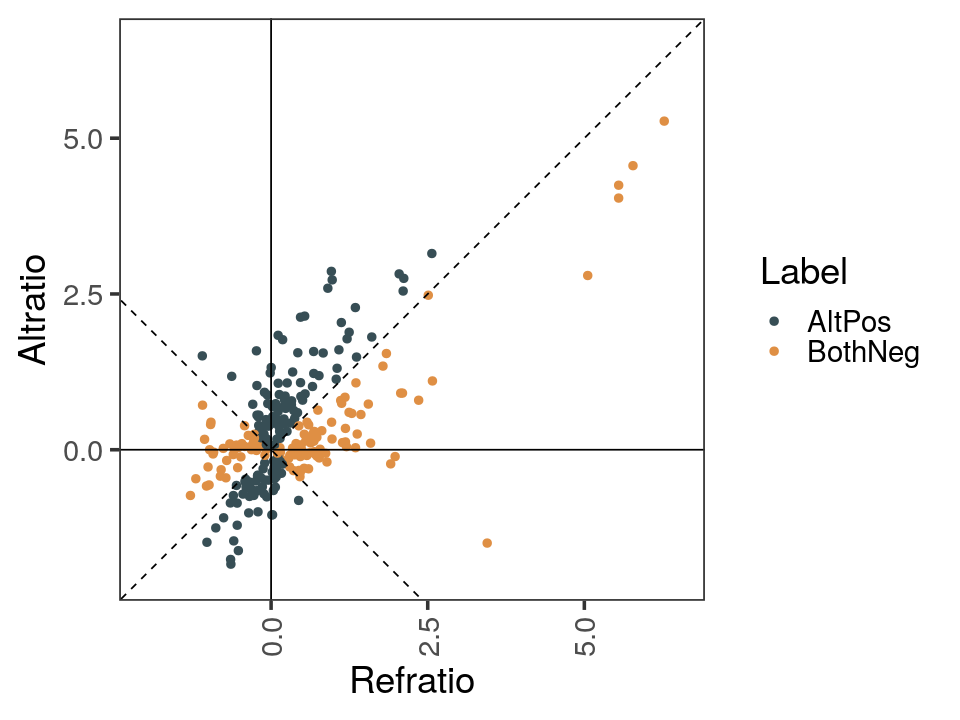

In [5]:
#proportion of regenes in different categories

data = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/allfinalreQTLs/cis-reQTL-control-heat-select-candidate-finalreQTLs-addPCinteraction-Dec-all.bonferroni.validation.txt",sep=' ',head=T)
data1 = data %>% mutate(Refratio = log2((RefHeatExp+1)/(RefCtrlExp+1)), 
                        Altratio = log2((AltHeatExp+1)/(AltCtrlExp+1))) %>% 
        mutate(Label=ifelse(abs(Refratio) > abs(Altratio), "BothNeg","AltPos"))
options(repr.plot.width=8, repr.plot.height=6)
x = ggscatter(data1, x="Refratio", y="Altratio", color="Label")+xlim(-2,6.5)+ylim(-2,6.5)+
    theme_bw(base_size = 22)+geom_abline(intercept = 0, slope = 1,linetype="dashed", color = "black")+
    geom_abline(intercept = 0, slope = -1, linetype="dashed", color = "black")+
    geom_hline(yintercept=0, color = "black")+
    geom_vline(xintercept=0, color = "black")+  
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
          plot.title = element_text(hjust = 0.5))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+scale_color_jama()
x